![header](https://i.imgur.com/I4ake6d.jpg)

# COPERNICUS MARINE IN SITU ASIA TRAINING (2/5)

<div style="text-align: right"><i> 13-03-Part-two-out-of-five </i></div>

# SUBSETTING & DOWNLOAD

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction">1. Introduction</a></span></li>
        <li>
            <span><a href="#2.-Setup" data-toc-modified-id="2.-Setup">2. Setup</a></span>
            <ul>
                <li><span><a href="#2.1.-Python-packages" data-toc-modified-id="2.1.-Python-packages">2.1. Python packages</a></span></li>
                <li><span><a href="#2.2.-Copernicus-Database" data-toc-modified-id="2.2.-Copernicus-Database">2.2. Copernicus database</a></span></li>
                <li><span><a href="#2.3.-Search-constrains" data-toc-modified-id="2.3-Search-constrains">2.3. Search constrains</a></span></li>
            </ul>
        </li>
        <li><span><a href="#3.-Getting-started" data-toc-modified-id="3.-Getting-started">3. Getting started</a></span></li>
        <li><span><a href="#4.-Operations" data-toc-modified-id="4.-Operations">4. Operations</a></span>
        <ul>
            <li>
            <span><a href="#4.1.-Subsetting" data-toc-modified-id="4.1.-Subsetting">4.1. Subsetting</a></span>
            <ul>
                <li><span><a href="#4.1.1.-By-collection" data-toc-modified-id="4.1.1.-By-collection">4.1.1. By collection</a></span></li>
                <li><span><a href="#4.1.2.-By-data-type" data-toc-modified-id="4.1.2.-By-data-type">4.1.2. By data type</a></span></li>
                <li><span><a href="#4.1.3.-By-file-type" data-toc-modified-id="4.1.3.-By-file-type">4.1.3. By file type</a></span></li>
                <li><span><a href="#4.1.4.-By-parameter" data-toc-modified-id="4.1.4.-By-parameter">4.1.4. By parameter</a></span></li>
                <li><span><a href="#4.1.5.-By-platform-code" data-toc-modified-id="4.1.5.-By-platform-code">4.1.5. By platform code</a></span></li>
                <li><span><a href="#4.1.6.-By-provider" data-toc-modified-id="4.1.6.-By-provider">4.1.6. By provider</a></span></li>
                <li><span><a href="#4.1.7.-By-several-criterias-at-once" data-toc-modified-id="4.1.7.By-several-criterias-at-once">4.1.7. By several criterias at once</a></span></li>
            </ul>
            </li>
            <li><span><a href="#4.2.-Exporting" data-toc-modified-id="4.2.-Exporting">4.2. Exporting</a></span></li>
            <li><span><a href="#4.3.-Downloading" data-toc-modified-id="4.3.-Downloading">4.3. Downloading</a></span></li>      
        </ul>
        </li>
        <li><span><a href="#5.-Wrap-up" data-toc-modified-id="5.-Wrap-up">5. Wrap-up</a></span></li>
        <li><span><a href="#6.-Next-Tutorial" data-toc-modified-id="6.-Next-Tutorial">6. Next tutorial</a></span></li>
    </ul>
</div>

***

## 1. Introduction 
[Go back to the "Table of contents"](#Table-of-Contents)

This notebook focuses on getting an overview of the content of a given In Situ dataset. Any In Situ dataset is just a bunch of netcdf files storing the measurements made by platforms (*drifters, profilers, gliders, moorings, HF-radars, vessels etc*) deployed in the ocean in order to monitor ocean state and variability.

| ![asia-animation.gif](img/asia-animation.gif)| 
|:--:| 
| *Last  location (point or trajectory) of the platforms providing near real time data in asian waters since 1901* |

The files composing a dataset are grouped in `collections`, typically named: `latest`, `monthly` and/or `history`. To ease the exploration of these collections, users will find a set of `index files` describing the content of each one (`index_latest.txt`, `index_monthly.txt` and `index_history.txt`). In addition to these index files, it is also possible to find further info regarding each platform contributing with files to the dataset on the `index_platform.txt` when available.

| Index |  Description |
| ------- | ----------- |
| `index_latest.txt`  |  List of available files within the latest collection + metadata | 
| `index_monthly.txt`   | List of available files within the monthly collection + metadata |
| `index_history.txt`   |  List of available files within the history collection + metadata |
| `index_platform.txt`   | Full list of platforms + metadata |

<div class="alert alert-block alert-success">
<b>OBJECTIVE</b>

***  
To select and download only those netCDFs matching our needs from the whole original set of files that composes a specific dataset by using the aforementioned index files. 
</div>

## 2. Setup
[Go back to the "Table of Contents"](#Table-of-Contents)

### 2.1. Python packages

For the notebook to properly run we need to first load the next packages available from the Jupyter Notebook Ecosystem. Please run the `next cell`:

In [15]:
import warnings
warnings.filterwarnings("ignore")

import IPython
import pandas as pd
import datetime
import random
import os
import ftputil
from shapely.geometry import box, Point
import plotly.express as px

<div class="alert alert-block alert-warning">
<b>WARNING</b>

***  
If any of them raises any error it means you need to install the module first. For doing so please:
1. Open a new cell in the notebook
2. Run <i>`!conda install packageName --yes`</i> or <i>`!conda install -c conda-forge packageName --yes`</i> or <i>`!pip install packageName`</i>
3. Import again!
<br><br>
Example: <i>how-to-solve import error for json2html module </i>

![errorImporting.gif](img/errorImporting.gif)
</div>

In addition to these packages, there are a set of Auxiliary Functions defined in the `/lib/functions.py` script that we are going to import too: `run the next cell`

In [16]:
import lib.functions as insitu

### 2.2. Copernicus Database
[Go back to the "Table of Contents"](#Table-of-Contents)

Please `set next your CMEMS User credentials` in the next cell and `run the cell` afterwards:

In [17]:
usr = 'inputHereYourCMEMSuser'
pas = 'inputHereYourCMEMSpass'

<div class="alert alert-block alert-warning">
<b>WARNING</b>

***  
**Don't you have credentials yet?** <br>Please go [here](https://resources.marine.copernicus.eu/?option=com_sla) to get the above credentials to be able to access CMEMS secured FTP server.
</div>

 As stated before, we will focus on exploring the content of a given In Situ product/dataset. By default we are going to explore the multiparameter dataset of the global region, but you are free to choose a different one.

<div class="alert alert-block alert-info">
<b>INFO</b>

***  
Find [here](tips/insitu-datasets-configurations.ipynb) the full list if In Situ dataset. Please, if you have the possibility to choose a regional product ("IBI", "NWS", "BAL", "ARC", "BS", "MED") instead if a global one (GLO), choose those better. They focus on certain [areas](https://www.seanoe.org/data/00333/44395/) and the amount of data will be always more manageable. 
</div>

After choosing, `copy the configuration on the next cell and run it`:

In [18]:
dataset = {
    'host': 'nrt.cmems-du.eu',
    'product': 'INSITU_GLO_NRT_OBSERVATIONS_013_030',
    'name': 'glo_multiparameter_nrt',
    'index_files': ['index_latest.txt', 'index_monthly.txt', 'index_history.txt'],
    'index_platform': 'index_platform.txt',
}

### 2.3. Search constrains
[Go back to the "Table of Contents"](#Table-of-Contents)

As the dataset we are going to analyse covers way more that your area and times of interest, let's narrow it down a little bit by defining a: 

- Area of interest

Set next a bounding box of interest int he next cell and `run it`:

In [19]:
targeted_geospatial_lat_min = -11.0  # enter min latitude of your bounding box
targeted_geospatial_lat_max = 15.0  # enter max latitude of your bounding box
targeted_geospatial_lon_min = 90.0 # enter min longitude of your bounding box
targeted_geospatial_lon_max = 142.0 # enter max longitude of your bounding box
targeted_bbox = [targeted_geospatial_lon_min, targeted_geospatial_lat_min, targeted_geospatial_lon_max, targeted_geospatial_lat_max]  # (minx, miny, maxx, maxy)

Let's get this polygon coords: `run the next cell`

In [20]:
upper_left = [targeted_geospatial_lon_min, targeted_geospatial_lat_max]
upper_right = [targeted_geospatial_lon_max, targeted_geospatial_lat_max]
lower_right = [targeted_geospatial_lon_max, targeted_geospatial_lat_min]
lower_left = [targeted_geospatial_lon_min, targeted_geospatial_lat_min]
coords = [upper_left, upper_right, lower_right, lower_left]

In [21]:
geojson = {
    "type": "FeatureCollection",
    "features":[{ 
    "type": "Feature",
    "geometry": {
        "type": "Polygon",
        "coordinates":  [coords]}
}]}
polygon=dict(sourcetype = 'geojson',source =geojson,below='', type = 'fill', color='blue', opacity=0.4)

Let's see it on a map: `run the next cell`

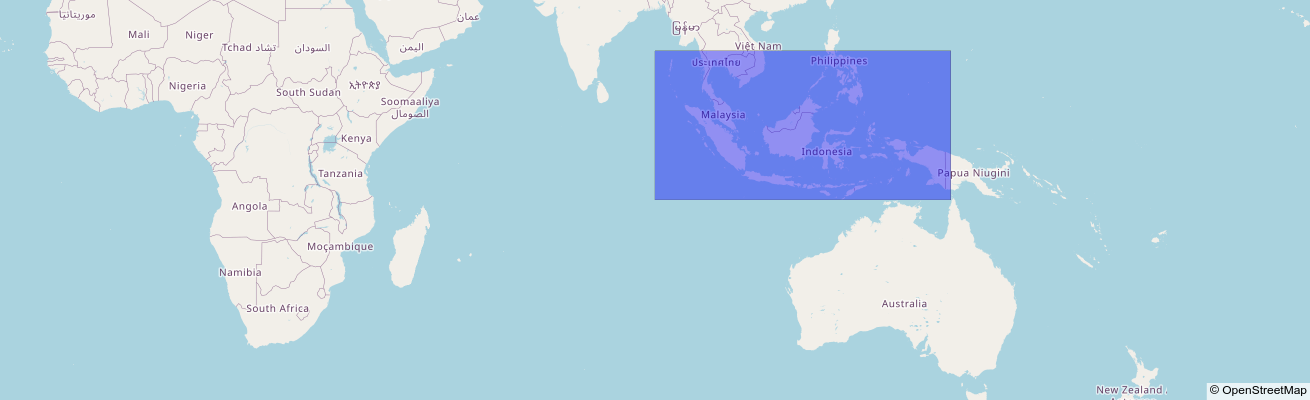

In [22]:
fig = px.scatter_mapbox(lat=[targeted_geospatial_lat_min], lon=[targeted_geospatial_lon_min], zoom=2, height=400, size=[0])
fig.layout.update(mapbox_layers =[polygon])
fig.update_layout(mapbox_style="open-street-map", margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

<div class="alert alert-block alert-warning" style="margin-left: 2em">
<b>Warning</b>

***  
If you do not see any map when running the next cell please change your navigator (try chrome!).

- Times of interest

Please `set the start/end dates` you are interested in `and run the cells bellow`:

In [23]:
targeted_range = '2016-01-01T00:00:00Z/2016-12-31T23:59:59Z' #set your own!

## 3. Getting started
[Go back to the "Table of Contents"](#Table-of-Contents)

For the analysis to be carried out we need the most recent version of the index files. By default we will save them into the current working directory. Nevertheless if you rather use a different one set it next:

In [24]:
path2indexes= os.getcwd()#default path to save the files
path2indexes

'/DATA/shared_trainers/training-ASIA/05 Jupyter Notebook - In Situ Observation Products'

Please `Run the next` cell to download the index files:

In [26]:
insitu.getIndexFiles(usr,pas,dataset,path2indexes)

.....Downloading index_latest.txt
.....Downloading index_monthly.txt
.....Downloading index_history.txt
.....Downloading index_platform.txt
Ready!


<div class="alert alert-block alert-warning">
<b>WARNING</b>

***  
**Are you getting a `permission denied` error?** 
<br>Please be aware that no `writes` are authorized in the 'shared_notebook' folder. Make sure you run this on you own space after copying the notebooks form shared_notebooks. If you are still facing a problem contact us trough [Mattermost](https://chat-cmems.mercator-ocean.fr/).
</div>

Let's load now the info contained in such files into a dataframe: `run the next cell!`

In [27]:
info = insitu.getIndexFilesInfo(usr, pas, dataset, path2indexes,targeted_bbox, targeted_range)

...Loading info from: index_platform.txt
...Loading info from: index_latest.txt
...Loading info from: index_monthly.txt
...Loading info from: index_history.txt
Ready!


`Run now the next cell` to see the information just loaded above:`Run now the next cell` to see the information just loaded above:

In [28]:
info.transpose()

,0,1,2,3,4,5,6,7,8,9,...,2882,2883,2884,2885,2886,2887,2888,2889,2890,2891
# catalog_id,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,...,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01
file_name,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...
geospatial_lat_min,13.5,12.913,10.855,-25,-25.002,-19.002,-33.5333,-29.3333,-16.4667,-25.3,...,-76.978,-70.546,-70.545,-1.15,-0.049,-5.378,12.153,10.522,-17.6,12.5479
geospatial_lat_max,20.932,31.741,35.987,15.937,-4.999,11.498,6.66667,35.4333,35.4833,-4.98333,...,88.677,88.679,85.518,14.015,0.076,2.399,13.131,15.087,-5.498,46.0749
geospatial_lon_min,170.526,151.17,149.456,137.045,174.997,148.75,50.65,112,137,-179.9,...,-179.95,-10.529,-179.983,80.375,89.785,67,80.303,68.851,66.544,-180
geospatial_lon_max,-160.742,-164.223,-151.305,160.998,-154.998,-139.999,105.133,139.8,161.15,179.85,...,179.987,125.533,179.972,99.364,90.207,97.233,90.807,91.655,93.352,179.999
time_coverage_start,2016-02-01T06:00:00Z,2016-05-01T03:00:00Z,2005-05-01T03:00:00Z,2016-07-16T18:57:00Z,2016-08-05T12:05:00Z,2016-09-01T03:09:00Z,2016-01-01T00:00:00Z,2016-03-01T00:00:00Z,2016-07-12T00:00:00Z,2016-08-04T00:00:00Z,...,2015-09-10T13:12:00Z,2015-01-12T20:00:00Z,2015-01-12T20:00:00Z,1993-07-25T12:00:00Z,2004-11-09T12:00:00Z,2009-09-17T12:00:00Z,2004-10-23T00:00:00Z,2008-09-16T11:00:00Z,2011-03-21T12:00:00Z,2008-10-28T02:01:42Z
time_coverage_end,2016-02-23T19:40:00Z,2016-05-31T20:45:00Z,2017-06-06T20:45:00Z,2016-07-30T08:11:00Z,2016-08-31T18:50:00Z,2016-09-28T10:33:00Z,2016-01-31T23:00:00Z,2016-03-15T23:00:00Z,2016-07-27T13:00:00Z,2016-08-31T23:00:00Z,...,2016-03-08T16:00:00Z,2016-03-08T16:00:00Z,2016-03-08T11:00:00Z,2021-02-28T12:00:00Z,2020-06-07T12:00:00Z,2021-02-28T23:00:00Z,2016-05-23T05:48:00Z,2016-05-23T06:00:00Z,2019-05-31T12:00:00Z,2020-09-28T18:52:58Z
institution,Japan (Unknown),Japan (Unknown),Japan (Unknown),Japan Agency for Marine-Earth Science and Tech...,Japan Agency for Marine-Earth Science and Tech...,Japan Agency for Marine-Earth Science and Tech...,Japan Agency for Marine-Earth Science and Tech...,Japan Agency for Marine-Earth Science and Tech...,Japan Agency for Marine-Earth Science and Tech...,Japan Agency for Marine-Earth Science and Tech...,...,Unknown institution,Unknown institution,Unknown institution,Pacific Marine Environmental Laboratory (PMEL)...,Pacific Marine Environmental Laboratory (PMEL)...,NOAA / Wdc For Oceanography (NOAA / NODC),India (Unknown),Unknown institution,NOAA / Wdc For Oceanography (NOAA / NODC),US DOC NOAA NMFS HONOLULU
date_update,2021-03-11T09:04:39Z,2021-03-11T09:04:39Z,2021-03-09T11:33:48Z,2021-03-11T09:43:34Z,2021-03-11T09:43:34Z,2021-03-11T09:43:34Z,2019-05-17T14:50:27Z,2019-05-17T14:50:27Z,2019-05-17T14:51:22Z,2019-05-17T14:51:22Z,...,2019-05-06T22:26:01Z,2019-05-06T23:05:14Z,2019-05-06T23:06:34Z,2021-03-08T10:18:24Z,2020-07-12T23:40:30Z,2021-03

Above you can see, on the left hand side, a number of metadata fields that describes the files available in each collection (latest, monthly and history) of the dataset chosen, such as: ftplink to download it (file_name), geospatial bounding box (geospatial_lat/lon_min/max), temporal coverage (time_coverage_start/end) etc. You can also see a dedicated column for each file with its corresponding values for the aforementioned descriptive metadata fields.

One of the most important fields in the above info is the `file_name`. This field contains the full path to the file in the FTP server, saving users from having to know the actual FTP structure. As the above preview does not render such field completely, let's see the first file full path: `Run the next cell`

In [32]:
info['file_name'].tolist()[0]

'ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSERVATIONS_013_030/glo_multiparameter_nrt/monthly/CT/201602/GL_PR_CT_JBZR_201602.nc'

Copy the path into the browser....the file will download straightaway!<br>
Next we will aim:
<ul><li>the `file_name` field (file path) for downloading operations</li>
    <li> the other fileds (file metadata) for the subsetting operations</li>
</ul>

## 4. Operations
[Go back to the "Table of Contents"](#Table-of-Contents)

### 4.1. Subsetting

Prior to <i>download</i> we need to select only those netCDF files that are of our interest.<br>There are many different criterias (if files contain a certain parameter, if they cover a certain area or/and a specific time range....).<br>Next we will see some examples!

#### 4.1.1. By collection

Let's select only the files that belong to one specific collection!

<div class="alert alert-block alert-info">
<b>TIP</b>

***
Please remember available options:
<ul>
    <li><i>latest</i>: daily files from platforms (last 30 days of data)</li>
    <li><i>monthly</i>: monthly files from platforms (last 5 years of data)</li>
    <li><i>history</i>: one file per platform (all platform data)</li>
</ul>
</div>

`Set one collecion` next and `run the cells`:

In [41]:
targeted_collection = 'monthly' #try 'latest', 'monthly' or 'history'

In [42]:
condition = info['file_name'].str.contains(targeted_collection)
subset = info[condition]
subset.transpose()

,0,1,3,4,5,6,7,8,9,10,...,2364,2365,2366,2367,2368,2370,2371,2372,2373,2374
# catalog_id,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,...,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01
file_name,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...
geospatial_lat_min,13.5,12.913,-25,-25.002,-19.002,-33.5333,-29.3333,-16.4667,-25.3,-24.9667,...,-23.9803,-31.9983,0.56367,-0.16167,-0.13667,-14.0604,-37.3833,-11.9333,-10.1167,-12.5167
geospatial_lat_max,20.932,31.741,15.937,-4.999,11.498,6.66667,35.4333,35.4833,-4.98333,25.15,...,34.8322,34.1453,33.779,34.5,34.051,-8.50877,0,-10.3667,-9.9167,-9.8
geospatial_lon_min,170.526,151.17,137.045,174.997,148.75,50.65,112,137,-179.9,-179.983,...,136.939,137.192,118.002,118.001,118,179.053,-179.983,128.2,129.033,127.517
geospatial_lon_max,-160.742,-164.223,160.998,-154.998,-139.999,105.133,139.8,161.15,179.85,179.783,...,153.196,154.502,141.203,137.088,137.633,-171.391,180,130.117,129.35,130.85
time_coverage_start,2016-02-01T06:00:00Z,2016-05-01T03:00:00Z,2016-07-16T18:57:00Z,2016-08-05T12:05:00Z,2016-09-01T03:09:00Z,2016-01-01T00:00:00Z,2016-03-01T00:00:00Z,2016-07-12T00:00:00Z,2016-08-04T00:00:00Z,2016-09-01T01:00:00Z,...,2016-08-01T00:00:00Z,2016-09-04T03:58:00Z,2016-10-01T00:00:00Z,2016-11-05T00:11:00Z,2016-12-01T00:00:00Z,2016-12-01T00:01:29Z,2016-06-01T00:00:00Z,2016-02-07T05:53:00Z,2016-03-19T09:58:00Z,2016-07-24T00:00:00Z
time_coverage_end,2016-02-23T19:40:00Z,2016-05-31T20:45:00Z,2016-07-30T08:11:00Z,2016-08-31T18:50:00Z,2016-09-28T10:33:00Z,2016-01-31T23:00:00Z,2016-03-15T23:00:00Z,2016-07-27T13:00:00Z,2016-08-31T23:00:00Z,2016-09-30T23:00:00Z,...,2016-08-31T21:36:00Z,2016-09-30T23:59:00Z,2016-10-29T22:53:00Z,2016-11-30T23:59:00Z,2016-12-30T00:13:00Z,2016-12-31T23:54:33Z,2016-06-30T23:59:00Z,2016-02-07T19:13:00Z,2016-03-19T15:40:00Z,2016-07-31T23:59:00Z
institution,Japan (Unknown),Japan (Unknown),Japan Agency for Marine-Earth Science and Tech...,Japan Agency for Marine-Earth Science and Tech...,Japan Agency for Marine-Earth Science and Tech...,Japan Agency for Marine-Earth Science and Tech...,Japan Agency for Marine-Earth Science and Tech...,Japan Agency for Marine-Earth Science and Tech...,Japan Agency for Marine-Earth Science and Tech...,Japan Agency for Marine-Earth Science and Tech...,...,Japan (Unknown),Japan (Unknown),Japan (Unknown),Japan (Unknown),Japan (Unknown),LOCEAN Laboratoire d'Oceanographie et du Climat,CSIRO Commonwealth Scientific and Industrial R...,Australian Institute of Marine Science (AIMS),Australian Institute of Marine Science (AIMS),Australian Institute of Marine Science (AIMS)
date_update,2021-03-11T09:04:39Z,2021-03-11T09:04:39Z,2021-03-11T09:43:34Z,2021-03-11T09:43:34Z,2021-03-11T09:43:34Z,2019-05-17T14:50:27Z,2019-05-17T14:50:27Z,2019-05-17T14:51:22Z,2019-05-17T14:51:22Z,2019-05-17T14:51:22Z,...,2019-05-17T12:46:43Z,2019-05-17T12:46:43Z,

<div class="alert alert-block alert-info"">
<b>TIP</b>

***  
To check if the above output only lists the files coming from a certain collection (the one set as targeted_collection') just check the `netcdf` row
<ul><li>'latest' timestamp: netcdf file name ends with a YYYYMMDD</li>
 <li>'monthly' timestamp: netcdf file name ends with a YYYYMM</li>
<li>'history' timestamp: netcdf file name ends with a YYYY or none timestamp</li></ul>
</div>

#### 4.1.2. By data type
[Go back to the "Table of Contents"](#Table-of-Contents)

Let's look for files produced by a certain data type.<br>`Please set a data type` next `and run the cell`:

In [47]:
targeted_data_type = 'PF' # try others: TG for Tide Gauges, PF for profilers etc =>Product User Manual: https://archimer.ifremer.fr/doc/00324/43494/

`Run the next cell` to obtain just the files reported by such data type:

In [48]:
condition = info['data_type'] == targeted_data_type
subset = info[condition]
subset.transpose()

,39,40,41,42,43,44,45,46,47,48,...,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612
# catalog_id,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,...,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01
file_name,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...
geospatial_lat_min,-0.589,-2.655,5.718,5.559,5.146,5.036,4.697,4.791,5.548,5.34,...,1.488,11.709,11.577,14.902,-17.124,-15.009,-18.375,14.142,-9.589,13.825
geospatial_lat_max,0.203,2.831,6.016,6.086,5.305,5.505,5.386,5.385,5.92,5.673,...,7.281,16.397,16.813,21.503,-10.261,-10.012,-10.167,19.561,-2.994,20.11
geospatial_lon_min,88.398,71.98,92.123,91.206,90.983,91.039,91.302,92.164,92.081,91.332,...,-179.627,141.611,162.649,137.831,105.978,100.946,102.734,85.604,-179.276,85.715
geospatial_lon_max,90.878,98.605,92.79,91.903,91.291,91.232,91.572,92.403,92.358,91.89,...,179.846,159.686,-177.682,149.348,113.434,119.214,113.626,91.568,179.873,93.465
time_coverage_start,2016-01-03T21:02:05Z,2010-05-10T05:40:22Z,2016-01-01T02:39:23Z,2016-02-02T08:43:14Z,2016-03-05T12:50:50Z,2016-04-06T20:18:38Z,2016-05-08T23:07:46Z,2016-06-10T08:57:31Z,2016-07-01T20:41:11Z,2016-08-03T00:39:47Z,...,2014-12-18T19:46:00Z,2015-01-02T18:24:42Z,2015-01-04T06:29:30Z,2014-02-22T21:32:43Z,2016-01-03T18:21:14Z,2016-01-05T01:09:34Z,2016-01-05T14:47:23Z,2014-12-07T00:41:00Z,2015-07-28T15:36:00Z,2015-09-12T19:21:00Z
time_coverage_end,2016-01-25T12:47:06Z,2020-01-15T10:37:04Z,2016-01-22T12:43:50Z,2016-02-23T20:42:36Z,2016-03-27T01:03:58Z,2016-04-28T08:29:54Z,2016-05-30T11:44:49Z,2016-06-21T01:09:39Z,2016-07-23T08:47:47Z,2016-08-24T13:48:33Z,...,2019-12-27T14:46:17Z,2019-10-22T21:21:08Z,2021-04-27T22:06:25Z,2017-05-27T22:28:27Z,2021-04-27T01:11:10Z,2021-04-08T20:05:31Z,2021-04-09T09:42:05Z,2017-06-05T18:40:00Z,2019-12-06T07:15:00Z,2018-02-05T17:29:00Z
institution,Pacific Marine Environmental Laboratory (PMEL)...,Pacific Marine Environmental Laboratory (PMEL)...,Pacific Marine Environmental Laboratory (PMEL)...,Pacific Marine Environmental Laboratory (PMEL)...,Pacific Marine Environmental Laboratory (PMEL)...,Pacific Marine Environmental Laboratory (PMEL)...,Pacific Marine Environmental Laboratory (PMEL)...,Pacific Marine Environmental Laboratory (PMEL)...,Pacific Marine Environmental Laboratory (PMEL)...,Pacific Marine Environmental Laboratory (PMEL)...,...,CSIRO Commonwealth Scientific and Industrial R...,CSIRO Commonwealth Scientific and Industrial R...,CSIRO Commonwealth Scientific and Industrial R...,Japan Agency for Marine-Earth Science and Tech...,CSIRO Commonwealth Scientific and Industrial R...,CSIRO Commonwealth Scientific and Industrial R...,CSIRO Commonwealth Scientific and Industrial R...,IFREMER Institut Francais de Recherche pour l'...,IFREMER Institut Francais de Recherche pour l'...,IFREMER Institut Francais de Recherche pour l'...
date_update,2019-05-12T06:46:38Z,2020-03-15T14:48:2

<div class="alert alert-block alert-info">
<b>TIP</b>

***  
To check if the subset only contains the aimed data type (targeted_data_type) just check the `data_type` row of the above output.
</div>

#### 4.1.3. By file type
[Go back to the "Table of Contents"](#Table-of-Contents)

Let's look for certain types of files.<br>`Please set a file type` next `and run the cell`:

In [ ]:
targeted_file_type = 'TS' # try others: RV for HF Radar radial velocities...=>Product User Manual: https://archimer.ifremer.fr/doc/00324/43494/

`Run the next cell` to obtain just the above type of files:

In [ ]:
condition = info['file_type'] == targeted_file_type
subset = info[condition]
subset.transpose()

<div class="alert alert-block alert-info">
<b>TIP</b>

***  
To check if the subset matches the aimed file type (targeted_file_type) just check the `file_type` row of the above output.
</div>

#### 4.1.4. By parameter
[Go back to the "Table of Contents"](#Table-of-Contents)

Let's look for files containing a certain parameter.<br>`Please set a parameter code` next `and run the cell`:

In [49]:
targeted_parameter = 'PSAL' #try others: TEMP, SLEV etc => In Situ parameter list: https://archimer.ifremer.fr/doc/00422/53381/

Run the next cell to obtain just the files reporting such parameter:

In [50]:
condition = info['parameters'].str.contains(targeted_parameter)
subset = info[condition]
subset.transpose()

,2,11,13,14,15,16,17,18,19,20,...,2624,2625,2758,2840,2861,2885,2886,2887,2890,2891
# catalog_id,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,...,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01
file_name,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...
geospatial_lat_min,10.855,-15,2.195,-2.009,7.999,-2.286,-1.05,-0.98333,-2.286,-4.641,...,-69.37,-69.3825,5.7414,2.7,10.826,-1.15,-0.049,-5.378,-17.6,12.5479
geospatial_lat_max,35.987,50.03,34.702,34.705,34.699,21.96,34.6833,31,49.998,49.4,...,64.163,78.5494,15.2522,19.875,25.342,14.015,0.076,2.399,-5.498,46.0749
geospatial_lon_min,149.456,122.33,136.982,139.835,136.958,136.831,140,139.117,134.334,126.36,...,-179.14,-179.996,172.811,137.331,114.159,80.375,89.785,67,66.544,-180
geospatial_lon_max,-151.305,-140.502,140.992,149.334,139.805,142.006,149.567,141.683,165.017,175,...,178.97,179.998,-85.1532,159.7,123.994,99.364,90.207,97.233,93.352,179.999
time_coverage_start,2005-05-01T03:00:00Z,1969-08-14T11:39:00Z,2016-01-09T09:17:00Z,2016-02-03T16:13:00Z,2016-07-03T09:48:00Z,2016-08-01T02:01:00Z,2016-02-05T07:30:00Z,2016-08-11T13:55:00Z,2016-01-09T09:17:00Z,1995-07-16T04:10:12Z,...,2011-07-22T02:24:00Z,2010-06-01T12:00:00Z,2016-09-07T10:30:00Z,2005-06-14T04:00:00Z,2009-01-11T03:40:00Z,1993-07-25T12:00:00Z,2004-11-09T12:00:00Z,2009-09-17T12:00:00Z,2011-03-21T12:00:00Z,2008-10-28T02:01:42Z
time_coverage_end,2017-06-06T20:45:00Z,2021-02-24T01:38:00Z,2016-01-23T03:41:00Z,2016-02-29T09:15:00Z,2016-07-31T17:29:00Z,2016-08-15T20:35:00Z,2016-02-28T19:55:00Z,2016-08-17T17:15:00Z,2016-11-19T02:04:00Z,2021-03-15T01:33:00Z,...,2016-02-28T18:18:00Z,2017-04-27T04:29:59Z,2019-04-10T17:00:00Z,2016-05-19T23:00:00Z,2018-12-28T22:00:00Z,2021-02-28T12:00:00Z,2020-06-07T12:00:00Z,2021-02-28T23:00:00Z,2019-05-31T12:00:00Z,2020-09-28T18:52:58Z
institution,Japan (Unknown),Japan Agency for Marine-Earth Science and Tech...,Japan Meteorological Agency (JMA),Japan Meteorological Agency (JMA),Japan Meteorological Agency (JMA),Japan Meteorological Agency (JMA),Japan Meteorological Agency (JMA),Japan Meteorological Agency (JMA),Japan Meteorological Agency (JMA),Japan Meteorological Agency (JMA),...,French Institution (Unknown),French Institution (Unknown),Atlantic Oceanographic and Meteorological Labo...,Unknown institution,Unknown institution,Pacific Marine Environmental Laboratory (PMEL)...,Pacific Marine Environmental Laboratory (PMEL)...,NOAA / Wdc For Oceanography (NOAA / NODC),NOAA / Wdc For Oceanography (NOAA / NODC),US DOC NOAA NMFS HONOLULU
date_update,2021-03-09T11:33:48Z,2021-04-18T06:39:02Z,2021-03-11T09:59:38Z,2021-03-11T10:08:57Z,2021-03-11T10:07:46Z,2021-03-11T10:07:46Z,2020-09-15T12:26:34Z,2020-09-15T12:27:06Z,2021-03-09T12:02:41Z,2021-04-18T06:38:59Z,...,2019-05-05T17:55:36Z,2019-05-09T08:06:34Z,2021-02-28T22:09:59Z,2019-05-06T13:20:33Z,2020-03-15T23:47:30Z,2021-03-08T10:18:24Z

<div class="alert alert-block alert-info">
<b>TIP</b>

***  
To check if the subset only contains the aimed parameter (targeted_parameter) just check the `parameters` row of the above output.
</div>

#### 4.1.5. By platform code
[Go back to the "Table of Contents"](#Table-of-Contents)

Let's look for files produced by a certain platform.<br>`Please set a platform code` next `and run the cell`:

In [ ]:
targeted_platform_code = 'SHIP'

Run the next cell to obtain just the files reported by such platform:

In [ ]:
condition = info['platform_code']==targeted_platform_code
subset = info[condition]
subset.transpose()

<div class="alert alert-block alert-info">
<b>TIP</b>

***  
To check if the subset matches the aimed platform (targeted_platform_code) just check the `platform_code` row of the above output.
</div>

#### 4.1.6. By provider
[Go back to the "Table of Contents"](#Table-of-Contents)

Let's look for files produced by a certain provider.<br>`Please set` a provider `name`or `edmo_code` ([SeaDataNet](https://edmo.seadatanet.org/search)) and `run the cell`:

<div class="alert alert-block alert-warning">
<b>WARNING</b>

***  
For this task we can either use the `institution` name or the `institution_edmo_code` ([SeaDataNet](https://edmo.seadatanet.org/search)), nevertheless if the chosen dataset does not have a `index_platform.txt` file you won't be able to look for providers using the 'institution_edmo_code' as this information comes form such file. In such case use solely the `institution`.
</div>

In [ ]:
key, targeted_provider = 'institution', 'WHOI'
#key, targeted_provider = 'institution_edmo_code', '3844'

Run the next cell to obtain just the files reported by such provider:

In [ ]:
condition = (info[key].astype(str).str.strip().str.contains(targeted_provider, na=False, case=False)) | (info[key] == targeted_provider)
subset = info[condition]
subset.transpose()

<div class="alert alert-block alert-info">
<b>TIP</b>

***  
To check if the subset matches the aimed provider (targeted_provider) just check the `insitution_edmo_code` and the `institution` row of the above output.
</div>

#### 4.1.7. By several criterias at once
[Go back to the "Table of Contents"](#Table-of-Contents)

Set the collection of interest, range of time and bbox to find only the files that match:

In [53]:
targeted_collection = 'history'
targeted_data_type = 'MO'
targeted_file_type = 'TS'
targeted_parameter = 'TEMP'

Run the next cell to apply the above filters:

In [55]:
condition1 = info['file_name'].str.contains(targeted_collection)
condition2 = info['data_type'] == targeted_data_type
condition3 = info['file_type'] == targeted_file_type
condition4 = info['parameters'].str.contains(targeted_parameter)

subset = info[(condition1) & (condition2) & (condition3) & (condition4)]
subset.transpose()

,2270,2273,2275,2278,2280,2286,2292,2310,2323,2336,2338,2350,2354,2356,2885,2886,2887,2888,2889,2890
# catalog_id,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01,COP-GLOBAL-01
file_name,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...,ftp://nrt.cmems-du.eu/Core/INSITU_GLO_NRT_OBSE...
geospatial_lat_min,1.486,2.234,1.97,11.908,14.873,8.7,5.133,5,2,7.639,7.629,-8.25983,-5,-1.5,-1.15,-0.049,-5.378,12.153,10.522,-17.6
geospatial_lat_max,2.482,5.246,12.431,12.093,15.053,10.536,11.593,5,2.057,8,7.63,-7.94167,-5,-1.5,14.015,0.076,2.399,13.131,15.087,-5.498
geospatial_lon_min,90,74.961,73.576,88.621,89.009,78.208,70.068,137,138,136.443,134.667,94.9175,95,90,80.375,89.785,67,80.303,68.851,66.544
geospatial_lon_max,90.932,92.976,98.594,90,90.022,94.051,92.603,137,138.124,137,134.669,95.179,95,90,99.364,90.207,97.233,90.807,91.655,93.352
time_coverage_start,2006-09-17T12:00:00Z,2006-11-16T12:00:00Z,2006-11-14T12:00:00Z,2007-11-15T12:00:00Z,2007-11-17T12:00:00Z,2005-03-13T06:00:00Z,2008-06-13T17:31:00Z,2001-09-29T00:30:00Z,1999-10-25T00:30:00Z,2001-09-28T00:30:00Z,2015-10-15T17:30:00Z,2009-11-14T00:30:00Z,2001-10-26T00:30:00Z,2001-10-23T00:30:00Z,1993-07-25T12:00:00Z,2004-11-09T12:00:00Z,2009-09-17T12:00:00Z,2004-10-23T00:00:00Z,2008-09-16T11:00:00Z,2011-03-21T12:00:00Z
time_coverage_end,2016-03-10T12:00:00Z,2018-07-31T12:00:00Z,2020-02-25T12:00:00Z,2020-11-24T06:00:00Z,2021-02-28T12:00:00Z,2016-05-23T06:00:00Z,2016-05-23T05:48:00Z,2016-08-12T13:30:00Z,2016-12-07T23:30:00Z,2021-02-28T23:30:00Z,2016-04-28T11:30:00Z,2021-02-28T23:30:00Z,2021-02-28T23:30:00Z,2016-01-18T23:30:00Z,2021-02-28T12:00:00Z,2020-06-07T12:00:00Z,2021-02-28T23:00:00Z,2016-05-23T05:48:00Z,2016-05-23T06:00:00Z,2019-05-31T12:00:00Z
institution,United states (Unknown),United states (Unknown),Pacific Marine Environmental Laboratory (PMEL)...,NOAA / Wdc For Oceanography (NOAA / NODC),NOAA / Wdc For Oceanography (NOAA / NODC),India (Unknown),India (Unknown),Japan Agency for Marine-Earth Science and Tech...,Japan Agency for Marine-Earth Science and Tech...,Japan Agency for Marine-Earth Science and Tech...,Scripps Institution of Oceanography La Jolla (...,NOAA / Wdc For Oceanography (NOAA / NODC),Japan Agency for Marine-Earth Science and Tech...,Japan Agency for Marine-Earth Science and Tech...,Pacific Marine Environmental Laboratory (PMEL)...,Pacific Marine Environmental Laboratory (PMEL)...,NOAA / Wdc For Oceanography (NOAA / NODC),India (Unknown),Unknown institution,NOAA / Wdc For Oceanography (NOAA / NODC)
date_update,2019-05-08T06:46:37Z,2019-05-08T06:46:37Z,2020-05-24T15:36:25Z,2021-01-06T08:39:26Z,2021-03-08T10:18:25Z,2020-11-24T20:39:28Z,2020-02-04T08:02:30Z,2019-05-09T19:46:42Z,2019-05-09T19:46:35Z,2021-03-08T21:37:34Z,2020-11-25T00:33:16Z,2021-03-08T23:02:47Z,2021-03-08T23:02:47Z,2019-05-10T01:16:05Z,2021-03-08T10:18:24Z,2020-07-12T23:40:30Z,2021-03-08T10:19:37Z,2020-11

### 4.2. Exporting
[Go back to the "Table of Contents"](#Table-of-Contents)

If you just want to export the above table containing ftp link to download each file in subset and some more metadata as csv for sharing it (a lot more compact than sharing the actual files), just run the `next cells`:

In [60]:
subsetName = 'subsetOffiles.csv'
output_dir = os.getcwd()# Defaults to the current working directory; change it as you please

In [61]:
path2csv = os.path.join(output_dir,subsetName)
path2csv

'/DATA/shared_trainers/training-ASIA/05 Jupyter Notebook - In Situ Observation Products/subsetOffiles.csv'

In [62]:
subset.to_csv(path2csv)

### 4.3. Downloading
[Go back to the "Table of Contents"](#Table-of-Contents)

After you have created your own subset (see above examples about how-to), we will loop over the files in such subset and download each of them from the FTP server thanks to the `file_name` column, field that contains the ftp link to the file.

- Set the output directory.<br>By default: the current working directory.`Run the next cell`:

In [63]:
output_dir = os.getcwd()
output_dir

'/DATA/shared_trainers/training-ASIA/05 Jupyter Notebook - In Situ Observation Products'

- Set the subset of files you aim to download. <br>This can be path to the CSV file created in 4.2 or the any subset created in 4.1.`Run the next cell`:

In [64]:
input_data = path2csv
#input_data = subset

- Download. <br>By default the download is limit to 5. Set a different treshold if you want.`Run the next cell`:

In [69]:
insitu.downloadFilesFromCSV(usr, pas, input_data, output_dir)

...Downloading files from platform : 23001
...........GL_TS_MO_23001.nc
...Downloading files from platform : 23004
...........GL_TS_MO_23004.nc
...Downloading files from platform : 23005
...........GL_TS_MO_23005.nc
...Downloading files from platform : 23006
...........GL_TS_MO_23006.nc
...Downloading files from platform : 23007
...........GL_TS_MO_23007.nc
...Downloading files from platform : 23008
...........GL_TS_MO_23008.nc
...Downloading files from platform : 23009
...........GL_TS_MO_23009.nc
...Downloading files from platform : 23017
...........GL_TS_MO_23017.nc
...Downloading files from platform : 23095
...........GL_TS_MO_23095.nc
...Downloading files from platform : 23099
...........GL_TS_MO_23099.nc
...Downloading files from platform : 23451
...........GL_TS_MO_23451.nc
...Downloading files from platform : 23491
...........GL_TS_MO_23491.nc
...Downloading files from platform : 52073
...........GL_TS_MO_52073.nc
...Downloading files from platform : 52080
...........GL_TS_MO_5

<div class="alert alert-block alert-info">
<b>TIP</b>

***  
To check if the files have been donwloaded just check if you find them in the directory specified as <i>output directory</i>.
</div>

<div class="alert alert-block alert-warning">
<b>WARNING</b>
    
***
FTP download might be forbidden in the remote server for security reasons. <br>If you experience an error please run this jupyter notebook locally for being able to actually download the files. Steps:
1. [Install anaconda](https://www.anaconda.com/distribution/): according to your OS (Windows,Linux,Mac...)
2. Navigate to the folder containing the notebooks (.ipynb files)
3. Run the following command at the Terminal (Mac/Linux) or Command Prompt (Windows): jupyter notebook
</div>

---

# 5. Wrap-up
[Go back to the "Table of Contents"](#Table-of-Contents)

So far you should already know how to subset the product/dataset by several subsetting criterias as well as exporting and downloading the resulting subset of files.